### Case study
The given dataset presents a comprehensive record of Indian Premier League (IPL) matches across multiple seasons, offering a rich foundation for a case study titled "Performance Analysis and Outcome Prediction in the Indian Premier League (IPL)." This case study aims to explore trends in team performances, the impact of strategic decisions such as the toss and choice to bat or bowl first, and the influence of key players on match outcomes. Each match entry includes detailed metadata such as the teams involved, scores of both innings, result, venue, dates, captains, key batsmen and bowlers, and even the umpires officiating the game. With over a thousand matches documented, the dataset allows for a deep dive into historical trends, such as which venues favor certain teams, how the toss outcome correlates with the final result, and the frequency and outcomes of close matches including Super Overs.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('Cricket_data.csv')
df.head()

season       id                                          name short_name  \
0     NaN  1370350          Chennai Super Kings v Gujarat Titans   CSK v GT   
1     NaN  1370351         Lucknow Super Giants v Mumbai Indians   LSG v MI   
2     NaN  1370352                                     TBC v TBC  TBC v TBC   
3     NaN  1370353                                     TBC v TBC  TBC v TBC   
4  2023.0  1359544  Royal Challengers Bangalore v Gujarat Titans   RCB v GT   

                                         description home_team away_team  \
0  Qualifier 1 (N), Indian Premier League at Chen...       CSK        GT   
1  Eliminator (N), Indian Premier League at Chenn...       LSG        MI   
2  Qualifier 2 (N), Indian Premier League at Ahme...       TBA       TBA   
3  Final (N), Indian Premier League at Ahmedabad,...       TBA       TBA   
4  70th Match (N), Indian Premier League at Benga...       RCB        GT   

  toss_won    decision 1st_inning_score  ...  \
0      NaN         NaN              NaN  ...   
1      NaN         NaN              NaN  ...   
2      NaN         NaN              NaN  ...   
3      NaN         NaN              NaN  ...   
4       GT  BOWL FIRST            197/5  ...   

                                         home_playx1  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  Virat Kohli (UKN),Faf du Plessis (UKN),Glenn M...   

                                         away_playx1  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  Wriddhiman Saha (WK),Shubman Gill (UKN),Vijay ...   

             away_key_batsman         away_key_bowler  \
0                         NaN                     NaN   
1                         NaN                     NaN   
2                         NaN                     NaN   
3                         NaN                     NaN   
4  Shubman Gill,Vijay Shankar  Noor Ahmad,Rashid Khan   

                                  match_days      umpire1          umpire2  \
0                                        NaN          NaN              NaN   
1                                        NaN          NaN              NaN   
2                                        NaN          NaN              NaN   
3                                        NaN          NaN              NaN   
4  21 May 2023 - night match (20-over match)  Nitin Menon  Virender Sharma   

      tv_umpire          referee reserve_umpire  
0           NaN              NaN            NaN  
1           NaN              NaN            NaN  
2           NaN              NaN            NaN  
3           NaN              NaN            NaN  
4  Tapan Sharma  Javagal Srinath     VM  Dhokre  

[5 rows x 43 columns]

In [5]:
df.shape

(1032, 43)

In [7]:
df.describe()

season            id      venue_id   home_overs    home_runs  \
count  1027.000000  1.032000e+03  1.032000e+03  1019.000000  1019.000000   
mean   2015.513145  8.665104e+05  1.255838e+05    19.089892   158.309127   
std       4.628349  3.530627e+05  1.644463e+05     2.095061    31.816295   
min    2008.000000  3.359820e+05  5.785100e+04     1.100000     2.000000   
25%    2012.000000  5.483118e+05  5.799100e+04    19.200000   138.000000   
50%    2015.000000  8.298080e+05  5.814200e+04    20.000000   160.000000   
75%    2020.000000  1.216501e+06  5.908900e+04    20.000000   180.000000   
max    2023.000000  1.370353e+06  1.070094e+06    20.000000   263.000000   

       home_wickets  home_boundaries   away_overs    away_runs  away_wickets  \
count   1019.000000      1019.000000  1017.000000  1017.000000   1017.000000   
mean       5.791953        19.412169    19.082104   155.962635      5.950836   
std        2.404542         5.850536     2.114934    31.334376      2.508164   
min        0.000000         0.000000     3.200000    41.000000      0.000000   
25%        4.000000        15.000000    19.200000   137.000000      4.000000   
50%        6.000000        19.000000    20.000000   158.000000      6.000000   
75%        8.000000        23.000000    20.000000   176.000000      8.000000   
max       10.000000        42.000000    20.000000   257.000000     10.000000   

       away_boundaries  
count      1017.000000  
mean         19.108161  
std           5.683248  
min           3.000000  
25%          15.000000  
50%          19.000000  
75%          23.000000  
max          41.000000

In [9]:
(df.isnull().sum()/len(df))*100

season              0.484496
id                  0.000000
name                0.000000
short_name          0.000000
description         0.000000
home_team           0.000000
away_team           0.000000
toss_won            0.484496
decision            0.484496
1st_inning_score    1.259690
2nd_inning_score    1.453488
winner              0.096899
result              0.000000
start_date          0.000000
end_date            0.000000
venue_id            0.000000
venue_name          0.000000
home_captain        0.484496
away_captain        0.484496
pom                 1.647287
points              6.298450
super_over          0.484496
home_overs          1.259690
home_runs           1.259690
home_wickets        1.259690
home_boundaries     1.259690
away_overs          1.453488
away_runs           1.453488
away_wickets        1.453488
away_boundaries     1.453488
highlights          2.616279
home_key_batsman    1.259690
home_key_bowler     2.519380
home_playx1         0.484496
away_playx1   

In [11]:
df.median(numeric_only=True)

season               2015.0
id                 829808.0
venue_id            58142.0
home_overs             20.0
home_runs             160.0
home_wickets            6.0
home_boundaries        19.0
away_overs             20.0
away_runs             158.0
away_wickets            6.0
away_boundaries        19.0
dtype: float64

In [13]:
df.mean(numeric_only=True)

season               2015.513145
id                 866510.402132
venue_id           125583.754845
home_overs             19.089892
home_runs             158.309127
home_wickets            5.791953
home_boundaries        19.412169
away_overs             19.082104
away_runs             155.962635
away_wickets            5.950836
away_boundaries        19.108161
dtype: float64

In [15]:
df['season'] = df['season'].fillna(df['season'].median())
df['home_overs'] = df['home_overs'].fillna(df['home_overs'].median())
df['home_runs'] = df['home_runs'].fillna(df['home_runs'].median())
df['home_wickets'] = df['home_wickets'].fillna(df['home_wickets'].median())
df['home_boundaries'] = df['home_boundaries'].fillna(df['home_boundaries'].median())
df['away_overs'] = df['away_overs'].fillna(df['away_overs'].median())
df['away_runs'] = df['away_runs'].fillna(df['away_runs'].median())
df['away_wickets'] = df['away_wickets'].fillna(df['away_wickets'].median())
df['away_boundaries'] = df['away_boundaries'].fillna(df['away_boundaries'].median())

In [17]:
(df.isnull().sum()/len(df))*100

season              0.000000
id                  0.000000
name                0.000000
short_name          0.000000
description         0.000000
home_team           0.000000
away_team           0.000000
toss_won            0.484496
decision            0.484496
1st_inning_score    1.259690
2nd_inning_score    1.453488
winner              0.096899
result              0.000000
start_date          0.000000
end_date            0.000000
venue_id            0.000000
venue_name          0.000000
home_captain        0.484496
away_captain        0.484496
pom                 1.647287
points              6.298450
super_over          0.484496
home_overs          0.000000
home_runs           0.000000
home_wickets        0.000000
home_boundaries     0.000000
away_overs          0.000000
away_runs           0.000000
away_wickets        0.000000
away_boundaries     0.000000
highlights          2.616279
home_key_batsman    1.259690
home_key_bowler     2.519380
home_playx1         0.484496
away_playx1   

In [19]:
df['toss_won']=df['toss_won'].fillna(df['toss_won'].mode()[0])
df['decision'] = df['decision'].fillna(df['decision'].mode()[0])
df['1st_inning_score'] = df['1st_inning_score'].fillna(df['1st_inning_score'].mode()[0])
df['2nd_inning_score'] = df['2nd_inning_score'].fillna(df['2nd_inning_score'].mode()[0])
df['winner'] = df['winner'].fillna(df['winner'].mode()[0])
df['home_captain'] = df['home_captain'].fillna(df['home_captain'].mode()[0])
df['away_captain'] = df['away_captain'].fillna(df['away_captain'].mode()[0])
df['pom'] = df['pom'].fillna(df['pom'].mode()[0])
df['points'] = df['points'].fillna(df['points'].mode()[0])
df['super_over'] = df['super_over'].fillna(df['super_over'].mode()[0])
df['home_key_batsman'] = df['home_key_batsman'].fillna(df['home_key_batsman'].mode()[0])
df['home_key_bowler'] = df['home_key_bowler'].fillna(df['home_key_bowler'].mode()[0])
df['home_playx1'] = df['home_playx1'].fillna(df['home_playx1'].mode()[0])
df['away_playx1'] = df['away_playx1'].fillna(df['away_playx1'].mode()[0])
df['away_key_batsman'] = df['away_key_batsman'].fillna(df['away_key_batsman'].mode()[0])
df['away_key_bowler'] = df['away_key_bowler'].fillna(df['away_key_bowler'].mode()[0])
df['match_days'] = df['match_days'].fillna(df['match_days'].mode()[0])
df['umpire1'] = df['umpire1'].fillna(df['umpire1'].mode()[0])
df['umpire2'] = df['umpire2'].fillna(df['umpire2'].mode()[0])
df['tv_umpire'] = df['tv_umpire'].fillna(df['tv_umpire'].mode()[0])
df['referee'] = df['referee'].fillna(df['referee'].mode()[0])
df['reserve_umpire'] = df['reserve_umpire'].fillna(df['reserve_umpire'].mode()[0])
df['highlights'] = df['highlights'].fillna(df['highlights'].mode()[0])

C:\Users\Impana\AppData\Local\Temp\ipykernel_13112\1643171133.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['super_over'] = df['super_over'].fillna(df['super_over'].mode()[0])


In [21]:
(df.isnull().sum()/len(df))*100

season              0.0
id                  0.0
name                0.0
short_name          0.0
description         0.0
home_team           0.0
away_team           0.0
toss_won            0.0
decision            0.0
1st_inning_score    0.0
2nd_inning_score    0.0
winner              0.0
result              0.0
start_date          0.0
end_date            0.0
venue_id            0.0
venue_name          0.0
home_captain        0.0
away_captain        0.0
pom                 0.0
points              0.0
super_over          0.0
home_overs          0.0
home_runs           0.0
home_wickets        0.0
home_boundaries     0.0
away_overs          0.0
away_runs           0.0
away_wickets        0.0
away_boundaries     0.0
highlights          0.0
home_key_batsman    0.0
home_key_bowler     0.0
home_playx1         0.0
away_playx1         0.0
away_key_batsman    0.0
away_key_bowler     0.0
match_days          0.0
umpire1             0.0
umpire2             0.0
tv_umpire           0.0
referee         

In [23]:
df.duplicated().sum()

0

In [25]:
df.drop_duplicates(inplace=True)

In [27]:
df.to_csv('Cricket_data_.csv',index=False)

In [29]:
df = pd.read_csv('Cricket_data_.csv')

In [31]:
Q1 = np.percentile(df['home_overs'],25,method='midpoint')
Q3 = np.percentile(df['home_overs'], 75, method='midpoint')
IQR = Q3 - Q1
IQR

0.8000000000000007

In [33]:
upper = Q3+1.5*IQR
upper_array = np.array(df['home_overs']>=upper)
print("Upper bound:", upper)
print(upper_array.sum())

lower = Q1 - 1.5*IQR
lower_array = np.array(df['home_overs'] <= lower)
print('Lower Bound:',lower)
print(lower_array.sum())

Upper bound: 21.200000000000003
0
Lower Bound: 18.0
149


In [35]:


# Check column names to ensure accuracy
print("Columns:", df.columns.tolist())
print('Old shape:', df.shape)

# Assuming your column is named 'home_overs' (based on your code)
# If it's different, use the actual name from the print above
Q1 = df['home_overs'].quantile(0.25)
Q3 = df['home_overs'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['home_overs'] < lower) | (df['home_overs'] > upper)].index

# Drop outliers
df.drop(index=outliers, inplace=True)
df.reset_index(drop=True, inplace=True)

print('New Shape:', df.shape)

Columns: ['season', 'id', 'name', 'short_name', 'description', 'home_team', 'away_team', 'toss_won', 'decision', '1st_inning_score', '2nd_inning_score', 'winner', 'result', 'start_date', 'end_date', 'venue_id', 'venue_name', 'home_captain', 'away_captain', 'pom', 'points', 'super_over', 'home_overs', 'home_runs', 'home_wickets', 'home_boundaries', 'away_overs', 'away_runs', 'away_wickets', 'away_boundaries', 'highlights', 'home_key_batsman', 'home_key_bowler', 'home_playx1', 'away_playx1', 'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1', 'umpire2', 'tv_umpire', 'referee', 'reserve_umpire']
Old shape: (1032, 43)
New Shape: (900, 43)


##### Feature Scaling

In [38]:
df1 = df.loc[:,['season','id','venue_id','home_overs','home_runs','home_wickets','home_boundaries','away_overs','away_runs','away_wickets','away_boundaries']]

##### Absolute Maximum Scaling

In [41]:
max_vals = np.max(np.abs(df1))
max_vals

1370353.0

In [43]:
(df1-max_vals)/max_vals

season            id  venue_id  home_overs  home_runs  home_wickets  \
0   -0.998530 -2.189217e-06 -0.957669   -0.999985  -0.999883     -0.999996   
1   -0.998530 -1.459478e-06 -0.957669   -0.999985  -0.999883     -0.999996   
2   -0.998530 -7.297390e-07 -0.957784   -0.999985  -0.999883     -0.999996   
3   -0.998530  0.000000e+00 -0.957784   -0.999985  -0.999883     -0.999996   
4   -0.998524 -7.887749e-03 -0.957750   -0.999985  -0.999856     -0.999996   
..        ...           ...       ...         ...        ...           ...   
895 -0.998535 -7.547814e-01 -0.957557   -0.999985  -0.999893     -0.999996   
896 -0.998535 -7.547807e-01 -0.957572   -0.999985  -0.999893     -0.999994   
897 -0.998535 -7.547989e-01 -0.957750   -0.999987  -0.999911     -0.999993   
898 -0.998535 -7.547938e-01 -0.957682   -0.999985  -0.999839     -0.999998   
899 -0.998535 -7.547785e-01 -0.749663   -0.999985  -0.999881     -0.999996   

     home_boundaries  away_overs  away_runs  away_wickets  away_boundaries  
0          -0.999986   -0.999985  -0.999885     -0.999996        -0.999986  
1          -0.999986   -0.999985  -0.999885     -0.999996        -0.999986  
2          -0.999986   -0.999985  -0.999885     -0.999996        -0.999986  
3          -0.999986   -0.999985  -0.999885     -0.999996        -0.999986  
4          -0.999980   -0.999986  -0.999856     -0.999997        -0.999982  
..               ...         ...        ...           ...              ...  
895        -0.999991   -0.999985  -0.999894     -0.999995        -0.999989  
896        -0.999988   -0.999986  -0.999892     -0.999998        -0.999986  
897        -0.999991   -0.999988  -0.999908     -0.999999        -0.999988  
898        -0.999975   -0.999985  -0.999869     -0.999995        -0.999981  
899        -0.999988   -0.999985  -0.999880     -0.999995        -0.999988  

[900 rows x 11 columns]

##### Min Max Scaling

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df1)
scaled_df = pd.DataFrame(scaled_data, columns=df1.columns)
scaled_df.head()

season        id  venue_id  home_overs  home_runs  home_wickets  \
0  0.466667  0.999997  0.000155         1.0   0.430939      0.555556   
1  0.466667  0.999998  0.000155         1.0   0.430939      0.555556   
2  0.466667  0.999999  0.000000         1.0   0.430939      0.555556   
3  0.466667  1.000000  0.000000         1.0   0.430939      0.555556   
4  1.000000  0.989550  0.000045         1.0   0.635359      0.444444   

   home_boundaries  away_overs  away_runs  away_wickets  away_boundaries  
0         0.410256    1.000000   0.535211           0.6         0.421053  
1         0.410256    1.000000   0.535211           0.6         0.421053  
2         0.410256    1.000000   0.535211           0.6         0.421053  
3         0.410256    1.000000   0.535211           0.6         0.421053  
4         0.641026    0.943038   0.723005           0.4         0.578947

##### Normalization

In [49]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaled_data = scaler.fit_transform(df1)
scaled_df = pd.DataFrame(scaled_data, columns = df1.columns)
scaled_df.head()

season        id  venue_id  home_overs  home_runs  home_wickets  \
0  0.001469  0.999104  0.042293    0.000015   0.000117      0.000004   
1  0.001469  0.999104  0.042293    0.000015   0.000117      0.000004   
2  0.001469  0.999109  0.042179    0.000015   0.000117      0.000004   
3  0.001469  0.999109  0.042179    0.000015   0.000117      0.000004   
4  0.001487  0.999093  0.042547    0.000015   0.000145      0.000004   

   home_boundaries  away_overs  away_runs  away_wickets  away_boundaries  
0         0.000014    0.000015   0.000115      0.000004         0.000014  
1         0.000014    0.000015   0.000115      0.000004         0.000014  
2         0.000014    0.000015   0.000115      0.000004         0.000014  
3         0.000014    0.000015   0.000115      0.000004         0.000014  
4         0.000021    0.000014   0.000146      0.000003         0.000018

##### Standardization

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)
scaled_df = pd.DataFrame(scaled_data,columns=df1.columns)
scaled_df.head()


season        id  venue_id  home_overs  home_runs  home_wickets  \
0 -0.134595  1.410906 -0.424342    0.494082  -0.117337     -0.033994   
1 -0.134595  1.410909 -0.424342    0.494082  -0.117337     -0.033994   
2 -0.134595  1.410912 -0.425287    0.494082  -0.117337     -0.033994   
3 -0.134595  1.410915 -0.425287    0.494082  -0.117337     -0.033994   
4  1.608360  1.380158 -0.425010    0.494082   1.229554     -0.504684   

   home_boundaries  away_overs  away_runs  away_wickets  away_boundaries  
0         -0.14609    0.441913  -0.039108      0.063613        -0.100707  
1         -0.14609    0.441913  -0.039108      0.063613        -0.100707  
2         -0.14609    0.441913  -0.039108      0.063613        -0.100707  
3         -0.14609    0.441913  -0.039108      0.063613        -0.100707  
4          1.45734   -0.071423   1.342522     -0.748466         0.995700

##### Roboust Scaling

In [55]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_data = scaler.fit_transform(df1)
scaled_df = pd.DataFrame(scaled_data,columns=df1.columns)
scaled_df.head()


season        id  venue_id  home_overs  home_runs  home_wickets  \
0     0.0  0.808949 -0.125775         0.0  -0.052632          0.00   
1     0.0  0.808951 -0.125775         0.0  -0.052632          0.00   
2     0.0  0.808952 -0.264836         0.0  -0.052632          0.00   
3     0.0  0.808954 -0.264836         0.0  -0.052632          0.00   
4     1.0  0.792777 -0.224092         0.0   0.921053         -0.25   

   home_boundaries  away_overs  away_runs  away_wickets  away_boundaries  
0            0.000       0.000  -0.027586           0.0         0.000000  
1            0.000       0.000  -0.027586           0.0         0.000000  
2            0.000       0.000  -0.027586           0.0         0.000000  
3            0.000       0.000  -0.027586           0.0         0.000000  
4            1.125      -1.125   1.075862          -0.5         0.857143

##### Categorical Encoding

In [58]:
pd.get_dummies(df)

season       id  venue_id  super_over  home_overs  home_runs  \
0    2015.0  1370350     58008       False        20.0      160.0   
1    2015.0  1370351     58008       False        20.0      160.0   
2    2015.0  1370352     57851       False        20.0      160.0   
3    2015.0  1370353     57851       False        20.0      160.0   
4    2023.0  1359544     57897       False        20.0      197.0   
..      ...      ...       ...         ...         ...        ...   
895  2008.0   336036     58162       False        20.0      146.0   
896  2008.0   336037     58142       False        20.0      147.0   
897  2008.0   336012     57897       False        18.0      122.0   
898  2008.0   336019     57991       False        20.0      221.0   
899  2008.0   336040    343050       False        20.0      163.0   

     home_wickets  home_boundaries  away_overs  away_runs  ...  \
0             6.0             19.0        20.0      158.0  ...   
1             6.0             19.0        20.0      158.0  ...   
2             6.0             19.0        20.0      158.0  ...   
3             6.0             19.0        20.0      158.0  ...   
4             5.0             28.0        19.1      198.0  ...   
..            ...              ...         ...        ...  ...   
895           5.0             13.0        20.0      145.0  ...   
896           8.0             16.0        19.2      148.0  ...   
897           9.0             13.0        16.0      126.0  ...   
898           3.0             34.0        20.0      180.0  ...   
899           5.0             16.0        20.0      164.0  ...   

     reserve_umpire_Umesh Dubey  reserve_umpire_VM  Dhokre  \
0                         False                      False   
1                         False                      False   
2                         False                      False   
3                         False                      False   
4                         False                       True   
..                          ...                        ...   
895                       False                      False   
896                       False                      False   
897                       False                      False   
898                       False                      False   
899                       False                      False   

     reserve_umpire_Vilas Bandiwadekar  reserve_umpire_Vinayak Kulkarni  \
0                                False                            False   
1                                False                            False   
2                                False                            False   
3                                False                            False   
4                                False                            False   
..                                 ...                              ...   
895                              False                            False   
896                              False                            False   
897                              False                            False   
898                              False                            False   
899                              False                            False   

     reserve_umpire_Vineet Kulkarni  reserve_umpire_Vinod Seshan  \
0                             False                        False   
1                             False                        False   
2                             False                        False   
3                             False                        False   
4                             False                        False   
..                              ...                          ...   
895                           False                        False   
896                           False                        False   
897                           False                        False   
898                           False                      

In [60]:
df.iloc[::,[15]]

venue_id
0       58008
1       58008
2       57851
3       57851
4       57897
..        ...
895     58162
896     58142
897     57897
898     57991
899    343050

[900 rows x 1 columns]

In [62]:
type(df.iloc[::,[15]])

pandas.core.frame.DataFrame

In [64]:
d = df.iloc[::,15]
d

0       58008
1       58008
2       57851
3       57851
4       57897
        ...  
895     58162
896     58142
897     57897
898     57991
899    343050
Name: venue_id, Length: 900, dtype: int64

In [66]:
type(d)

pandas.core.series.Series

In [68]:
df['venue_id']

0       58008
1       58008
2       57851
3       57851
4       57897
        ...  
895     58162
896     58142
897     57897
898     57991
899    343050
Name: venue_id, Length: 900, dtype: int64

In [70]:
type(df['venue_id'])

pandas.core.series.Series

In [72]:
df['venue_id'].value_counts()

venue_id
58324      100
57897       75
57980       74
58040       71
58008       68
58142       59
57991       56
545380      47
392627      44
58162       42
343050      33
59396       33
59392       27
57851       26
58317       24
59089       16
58056       10
58547       10
59079       10
377285      10
58027        7
59120        7
59068        6
485865       6
58150        6
1070094      6
59159        5
601879       4
58230        3
375326       3
59098        3
59135        3
680295       2
58204        2
59042        2
Name: count, dtype: int64

In [74]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
enc = OneHotEncoder()
enc_data = enc.fit_transform(df[['venue_id']])
enc_data

<900x35 sparse matrix of type '<class 'numpy.float64'>'
	with 900 stored elements in Compressed Sparse Row format>

In [76]:
enc_data.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [78]:
enc_df = pd.DataFrame(enc_data.toarray())
enc_df.head()

0    1    2    3    4    5    6    7    8    9   ...   25   26   27   28  \
0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    29   30   31   32   33   34  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 35 columns]

In [80]:
df1 = df.join(enc_df)
df1

season       id                                          name short_name  \
0    2015.0  1370350          Chennai Super Kings v Gujarat Titans   CSK v GT   
1    2015.0  1370351         Lucknow Super Giants v Mumbai Indians   LSG v MI   
2    2015.0  1370352                                     TBC v TBC  TBC v TBC   
3    2015.0  1370353                                     TBC v TBC  TBC v TBC   
4    2023.0  1359544  Royal Challengers Bangalore v Gujarat Titans   RCB v GT   
..      ...      ...                                           ...        ...   
895  2008.0   336036             Rajasthan Royals v Mumbai Indians    RR v MI   
896  2008.0   336037         Deccan Chargers v Chennai Super Kings   DC v CSK   
897  2008.0   336012  Royal Challengers Bangalore v Mumbai Indians   RCB v MI   
898  2008.0   336019            Kings XI Punjab v Rajasthan Royals  KXIP v RR   
899  2008.0   336040        Chennai Super Kings v Rajasthan Royals   CSK v RR   

                                           description home_team away_team  \
0    Qualifier 1 (N), Indian Premier League at Chen...       CSK        GT   
1    Eliminator (N), Indian Premier League at Chenn...       LSG        MI   
2    Qualifier 2 (N), Indian Premier League at Ahme...       TBA       TBA   
3    Final (N), Indian Premier League at Ahmedabad,...       TBA       TBA   
4    70th Match (N), Indian Premier League at Benga...       RCB        GT   
..                                                 ...       ...       ...   
895  53rd match (N), Indian Premier League at Jaipu...        RR        MI   
896  54th match (N), Indian Premier League at Hyder...       SRH       CSK   
897  55th match (D/N), Indian Premier League at Ben...       RCB        MI   
898  56th match (N), Indian Premier League at Mohal...      KXIP        RR   
899  Final (N), Indian Premier League at Mumbai, Ju...       CSK        RR   

    toss_won    decision 1st_inning_score  ...   25   26   27   28   29   30  \
0         MI  BOWL FIRST            187/5  ...  0.0  0.0  0.0  0.0  0.0  0.0   
1         MI  BOWL FIRST            187/5  ...  0.0  0.0  0.0  0.0  0.0  0.0   
2         MI  BOWL FIRST            187/5  ...  0.0  0.0  0.0  0.0  0.0  0.0   
3         MI  BOWL FIRST            187/5  ...  0.0  0.0  0.0  0.0  0.0  0.0   
4         GT  BOWL FIRST            197/5  ...  0.0  0.0  0.0  0.0  0.0  0.0   
..       ...         ...              ...  ...  ...  ...  ...  ...  ...  ...   
895       RR  BOWL FIRST            145/7  ...  0.0  0.0  0.0  0.0  0.0  0.0   
896      SRH   BAT FIRST            147/8  ...  0.0  0.0  0.0  0.0  0.0  0.0   
897       MI  BOWL FIRST            122/9  ...  0.0  0.0  0.0  0.0  0.0  0.0   
898       RR  BOWL FIRST            221/3  ...  0.0  0.0  0.0  0.0  0.0  0.0   
899       RR  BOWL FIRST            163/5  ...  0.0  1.0  0.0  0.0  0.0  0.0   

      31   32   33   34  
0    0.0  0.0  0.0  0.0  
1    0.0  0.0  0.0  0.0  
2    0.0  0.0  0.0  0.0  
3    0.0  0.0  0.0  0.0  
4    0.0  0.0  0.0  0.0  
..   ...  ...  ...  ...  
895  0.0  0.0  0.0  0.0  
896  0.0  0.0  0.0  0.0  
897  0.0  0.0  0.0  0.0  
898  0.0  0.0  0.0  0.0  
899  0.0  0.0  0.0  0.0  

[900 rows x 78 columns]

In [81]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['venue_id'] = le.fit_transform(df['venue_id'])

In [82]:
df

season       id                                          name short_name  \
0    2015.0  1370350          Chennai Super Kings v Gujarat Titans   CSK v GT   
1    2015.0  1370351         Lucknow Super Giants v Mumbai Indians   LSG v MI   
2    2015.0  1370352                                     TBC v TBC  TBC v TBC   
3    2015.0  1370353                                     TBC v TBC  TBC v TBC   
4    2023.0  1359544  Royal Challengers Bangalore v Gujarat Titans   RCB v GT   
..      ...      ...                                           ...        ...   
895  2008.0   336036             Rajasthan Royals v Mumbai Indians    RR v MI   
896  2008.0   336037         Deccan Chargers v Chennai Super Kings   DC v CSK   
897  2008.0   336012  Royal Challengers Bangalore v Mumbai Indians   RCB v MI   
898  2008.0   336019            Kings XI Punjab v Rajasthan Royals  KXIP v RR   
899  2008.0   336040        Chennai Super Kings v Rajasthan Royals   CSK v RR   

                                           description home_team away_team  \
0    Qualifier 1 (N), Indian Premier League at Chen...       CSK        GT   
1    Eliminator (N), Indian Premier League at Chenn...       LSG        MI   
2    Qualifier 2 (N), Indian Premier League at Ahme...       TBA       TBA   
3    Final (N), Indian Premier League at Ahmedabad,...       TBA       TBA   
4    70th Match (N), Indian Premier League at Benga...       RCB        GT   
..                                                 ...       ...       ...   
895  53rd match (N), Indian Premier League at Jaipu...        RR        MI   
896  54th match (N), Indian Premier League at Hyder...       SRH       CSK   
897  55th match (D/N), Indian Premier League at Ben...       RCB        MI   
898  56th match (N), Indian Premier League at Mohal...      KXIP        RR   
899  Final (N), Indian Premier League at Mumbai, Ju...       CSK        RR   

    toss_won    decision 1st_inning_score  ...  \
0         MI  BOWL FIRST            187/5  ...   
1         MI  BOWL FIRST            187/5  ...   
2         MI  BOWL FIRST            187/5  ...   
3         MI  BOWL FIRST            187/5  ...   
4         GT  BOWL FIRST            197/5  ...   
..       ...         ...              ...  ...   
895       RR  BOWL FIRST            145/7  ...   
896      SRH   BAT FIRST            147/8  ...   
897       MI  BOWL FIRST            122/9  ...   
898       RR  BOWL FIRST            221/3  ...   
899       RR  BOWL FIRST            163/5  ...   

                                           home_playx1  \
0    Adam Gilchrist (WK),VVS Laxman (BT),Herschelle...   
1    Adam Gilchrist (WK),VVS Laxman (BT),Herschelle...   
2    Adam Gilchrist (WK),VVS Laxman (BT),Herschelle...   
3    Adam Gilchrist (WK),VVS Laxman (BT),Herschelle...   
4    Virat Kohli (UKN),Faf du Plessis (UKN),Glenn M...   
..                                                 ...   
895  Kamran Akmal (WK),Swapnil Asnodkar (BT),Yusuf ...   
896  Adam Gilchrist (WK),Herschelle Gibbs (UKN),Sco...   
897  Mark Boucher (BT),Shreevats Goswami (WK),Misba...   
898  Shaun Marsh (BT),James Hopes (AR),Yuvraj Singh...   
899  Parthiv Patel (WK),Vidyut Sivaramakrishnan (UK...   

                                           away_playx1  \
0    Abhishek Sharma (AR),Kane Williamson (UKN),Rah...   
1    Abhishek Sharma (AR),Kane Williamson (UKN),Rah...   
2    Abhishek Sharma (AR),Kane Williamson (UKN),Rah...   
3    Abhishek Sharma (AR),Kane Williamson (UKN),Rah...   
4    Wriddhiman Saha (WK),Shubman Gill (UKN),Vijay ...   
..                                                 ...   
895  Sanath Jayasuriya (AR),Sachin Tendulkar (BT),A...   
896  Parthiv Patel (WK),Stephen Fleming (BT),Suresh...   
897  Sanath Jayasuriya (AR),Sachin Tendulkar (BT),R...   
898  Mohammad Kaif (BT),Niraj Patel (UKN),Younis Kh...   
899  Niraj Patel (UKN),Swapnil Asnodkar (BT),Kamran...   

                       away_key_batsman                   away_key_bowler  \
0               Chris G

In [83]:
le.classes_

array([  57851,   57897,   57980,   57991,   58008,   58027,   58040,
         58056,   58142,   58150,   58162,   58204,   58230,   58317,
         58324,   58547,   59042,   59068,   59079,   59089,   59098,
         59120,   59135,   59159,   59392,   59396,  343050,  375326,
        377285,  392627,  485865,  545380,  601879,  680295, 1070094],
      dtype=int64)

In [84]:
df

season       id                                          name short_name  \
0    2015.0  1370350          Chennai Super Kings v Gujarat Titans   CSK v GT   
1    2015.0  1370351         Lucknow Super Giants v Mumbai Indians   LSG v MI   
2    2015.0  1370352                                     TBC v TBC  TBC v TBC   
3    2015.0  1370353                                     TBC v TBC  TBC v TBC   
4    2023.0  1359544  Royal Challengers Bangalore v Gujarat Titans   RCB v GT   
..      ...      ...                                           ...        ...   
895  2008.0   336036             Rajasthan Royals v Mumbai Indians    RR v MI   
896  2008.0   336037         Deccan Chargers v Chennai Super Kings   DC v CSK   
897  2008.0   336012  Royal Challengers Bangalore v Mumbai Indians   RCB v MI   
898  2008.0   336019            Kings XI Punjab v Rajasthan Royals  KXIP v RR   
899  2008.0   336040        Chennai Super Kings v Rajasthan Royals   CSK v RR   

                                           description home_team away_team  \
0    Qualifier 1 (N), Indian Premier League at Chen...       CSK        GT   
1    Eliminator (N), Indian Premier League at Chenn...       LSG        MI   
2    Qualifier 2 (N), Indian Premier League at Ahme...       TBA       TBA   
3    Final (N), Indian Premier League at Ahmedabad,...       TBA       TBA   
4    70th Match (N), Indian Premier League at Benga...       RCB        GT   
..                                                 ...       ...       ...   
895  53rd match (N), Indian Premier League at Jaipu...        RR        MI   
896  54th match (N), Indian Premier League at Hyder...       SRH       CSK   
897  55th match (D/N), Indian Premier League at Ben...       RCB        MI   
898  56th match (N), Indian Premier League at Mohal...      KXIP        RR   
899  Final (N), Indian Premier League at Mumbai, Ju...       CSK        RR   

    toss_won    decision 1st_inning_score  ...  \
0         MI  BOWL FIRST            187/5  ...   
1         MI  BOWL FIRST            187/5  ...   
2         MI  BOWL FIRST            187/5  ...   
3         MI  BOWL FIRST            187/5  ...   
4         GT  BOWL FIRST            197/5  ...   
..       ...         ...              ...  ...   
895       RR  BOWL FIRST            145/7  ...   
896      SRH   BAT FIRST            147/8  ...   
897       MI  BOWL FIRST            122/9  ...   
898       RR  BOWL FIRST            221/3  ...   
899       RR  BOWL FIRST            163/5  ...   

                                           home_playx1  \
0    Adam Gilchrist (WK),VVS Laxman (BT),Herschelle...   
1    Adam Gilchrist (WK),VVS Laxman (BT),Herschelle...   
2    Adam Gilchrist (WK),VVS Laxman (BT),Herschelle...   
3    Adam Gilchrist (WK),VVS Laxman (BT),Herschelle...   
4    Virat Kohli (UKN),Faf du Plessis (UKN),Glenn M...   
..                                                 ...   
895  Kamran Akmal (WK),Swapnil Asnodkar (BT),Yusuf ...   
896  Adam Gilchrist (WK),Herschelle Gibbs (UKN),Sco...   
897  Mark Boucher (BT),Shreevats Goswami (WK),Misba...   
898  Shaun Marsh (BT),James Hopes (AR),Yuvraj Singh...   
899  Parthiv Patel (WK),Vidyut Sivaramakrishnan (UK...   

                                           away_playx1  \
0    Abhishek Sharma (AR),Kane Williamson (UKN),Rah...   
1    Abhishek Sharma (AR),Kane Williamson (UKN),Rah...   
2    Abhishek Sharma (AR),Kane Williamson (UKN),Rah...   
3    Abhishek Sharma (AR),Kane Williamson (UKN),Rah...   
4    Wriddhiman Saha (WK),Shubman Gill (UKN),Vijay ...   
..                                                 ...   
895  Sanath Jayasuriya (AR),Sachin Tendulkar (BT),A...   
896  Parthiv Patel (WK),Stephen Fleming (BT),Suresh...   
897  Sanath Jayasuriya (AR),Sachin Tendulkar (BT),R...   
898  Mohammad Kaif (BT),Niraj Patel (UKN),Younis Kh...   
899  Niraj Patel (UKN),Swapnil Asnodkar (BT),Kamran...   

                       away_key_batsman                   away_key_bowler  \
0               Chris G

In [85]:
df = pd.read_csv('Cricket_data_.csv')
df

season       id                                          name  \
0     2015.0  1370350          Chennai Super Kings v Gujarat Titans   
1     2015.0  1370351         Lucknow Super Giants v Mumbai Indians   
2     2015.0  1370352                                     TBC v TBC   
3     2015.0  1370353                                     TBC v TBC   
4     2023.0  1359544  Royal Challengers Bangalore v Gujarat Titans   
...      ...      ...                                           ...   
1027  2008.0   336012  Royal Challengers Bangalore v Mumbai Indians   
1028  2008.0   336019            Kings XI Punjab v Rajasthan Royals   
1029  2008.0   336038           Delhi Daredevils v Rajasthan Royals   
1030  2008.0   336039         Chennai Super Kings v Kings XI Punjab   
1031  2008.0   336040        Chennai Super Kings v Rajasthan Royals   

      short_name                                        description home_team  \
0       CSK v GT  Qualifier 1 (N), Indian Premier League at Chen...       CSK   
1       LSG v MI  Eliminator (N), Indian Premier League at Chenn...       LSG   
2      TBC v TBC  Qualifier 2 (N), Indian Premier League at Ahme...       TBA   
3      TBC v TBC  Final (N), Indian Premier League at Ahmedabad,...       TBA   
4       RCB v GT  70th Match (N), Indian Premier League at Benga...       RCB   
...          ...                                                ...       ...   
1027    RCB v MI  55th match (D/N), Indian Premier League at Ben...       RCB   
1028   KXIP v RR  56th match (N), Indian Premier League at Mohal...      KXIP   
1029     DC v RR  1st Semi-Final (N), Indian Premier League at M...        DC   
1030  CSK v KXIP  2nd Semi-Final (N), Indian Premier League at M...       CSK   
1031    CSK v RR  Final (N), Indian Premier League at Mumbai, Ju...       CSK   

     away_team toss_won    decision 1st_inning_score  ...  \
0           GT       MI  BOWL FIRST            187/5  ...   
1           MI       MI  BOWL FIRST            187/5  ...   
2          TBA       MI  BOWL FIRST            187/5  ...   
3          TBA       MI  BOWL FIRST            187/5  ...   
4           GT       GT  BOWL FIRST            197/5  ...   
...        ...      ...         ...              ...  ...   
1027        MI       MI  BOWL FIRST            122/9  ...   
1028        RR       RR  BOWL FIRST            221/3  ...   
1029        RR       DC  BOWL FIRST            192/9  ...   
1030      KXIP     KXIP   BAT FIRST            112/8  ...   
1031        RR       RR  BOWL FIRST            163/5  ...   

                                            home_playx1  \
0     Adam Gilchrist (WK),VVS Laxman (BT),Herschelle...   
1     Adam Gilchrist (WK),VVS Laxman (BT),Herschelle...   
2     Adam Gilchrist (WK),VVS Laxman (BT),Herschelle...   
3     Adam Gilchrist (WK),VVS Laxman (BT),Herschelle...   
4     Virat Kohli (UKN),Faf du Plessis (UKN),Glenn M...   
...                                                 ...   
1027  Mark Boucher (BT),Shreevats Goswami (WK),Misba...   
1028  Shaun Marsh (BT),James Hopes (AR),Yuvraj Singh...   
1029  Gautam Gambhir (BT),Virender Sehwag (BT),Shikh...   
1030  Parthiv Patel (WK),Vidyut Sivaramakrishnan (UK...   
1031  Parthiv Patel (WK),Vidyut Sivaramakrishnan (UK...   

                                            away_playx1  \
0     Abhishek Sharma (AR),Kane Williamson (UKN),Rah...   
1     Abhishek Sharma (AR),Kane Williamson (UKN),Rah...   
2     Abhishek Sharma (AR),Kane Williamson (UKN),Rah...   
3     Abhishek Sharma (AR),Kane Williamson (UKN),Rah...   
4     Wriddhiman Saha (WK),Shubman Gill (UKN),Vijay ...   
...                                                 ...   
1027  Sanath Jayasuriya (AR),Sachin Tendulkar (BT),R...   
1028  Mohammad Kaif (BT),Niraj Patel (UKN),Younis Kh...   
1029  Graeme Smith (BT),Swapnil Asnodkar (BT),Sohail...   
1030  Shaun Marsh (BT),James Hopes (AR),Kumar Sangak...   
1031  Niraj Patel (UKN),Swapnil Asnodkar (BT),Kamran...   

                        away_

In [86]:
df['toss_won']

0         MI
1         MI
2         MI
3         MI
4         GT
        ... 
1027      MI
1028      RR
1029      DC
1030    KXIP
1031      RR
Name: toss_won, Length: 1032, dtype: object

In [89]:
df['toss_won']=df['toss_won'].astype('category')
df['toss_won']

0         MI
1         MI
2         MI
3         MI
4         GT
        ... 
1027      MI
1028      RR
1029      DC
1030    KXIP
1031      RR
Name: toss_won, Length: 1032, dtype: category
Categories (16, object): ['CSK', 'DC', 'GL', 'GT', ..., 'RPS', 'RR', 'SRH', 'no toss']

In [96]:
df['toss_won_new']=df['toss_won'].cat.codes
df

season       id                                          name  \
0     2015.0  1370350          Chennai Super Kings v Gujarat Titans   
1     2015.0  1370351         Lucknow Super Giants v Mumbai Indians   
2     2015.0  1370352                                     TBC v TBC   
3     2015.0  1370353                                     TBC v TBC   
4     2023.0  1359544  Royal Challengers Bangalore v Gujarat Titans   
...      ...      ...                                           ...   
1027  2008.0   336012  Royal Challengers Bangalore v Mumbai Indians   
1028  2008.0   336019            Kings XI Punjab v Rajasthan Royals   
1029  2008.0   336038           Delhi Daredevils v Rajasthan Royals   
1030  2008.0   336039         Chennai Super Kings v Kings XI Punjab   
1031  2008.0   336040        Chennai Super Kings v Rajasthan Royals   

      short_name                                        description home_team  \
0       CSK v GT  Qualifier 1 (N), Indian Premier League at Chen...       CSK   
1       LSG v MI  Eliminator (N), Indian Premier League at Chenn...       LSG   
2      TBC v TBC  Qualifier 2 (N), Indian Premier League at Ahme...       TBA   
3      TBC v TBC  Final (N), Indian Premier League at Ahmedabad,...       TBA   
4       RCB v GT  70th Match (N), Indian Premier League at Benga...       RCB   
...          ...                                                ...       ...   
1027    RCB v MI  55th match (D/N), Indian Premier League at Ben...       RCB   
1028   KXIP v RR  56th match (N), Indian Premier League at Mohal...      KXIP   
1029     DC v RR  1st Semi-Final (N), Indian Premier League at M...        DC   
1030  CSK v KXIP  2nd Semi-Final (N), Indian Premier League at M...       CSK   
1031    CSK v RR  Final (N), Indian Premier League at Mumbai, Ju...       CSK   

     away_team toss_won    decision 1st_inning_score  ...  \
0           GT       MI  BOWL FIRST            187/5  ...   
1           MI       MI  BOWL FIRST            187/5  ...   
2          TBA       MI  BOWL FIRST            187/5  ...   
3          TBA       MI  BOWL FIRST            187/5  ...   
4           GT       GT  BOWL FIRST            197/5  ...   
...        ...      ...         ...              ...  ...   
1027        MI       MI  BOWL FIRST            122/9  ...   
1028        RR       RR  BOWL FIRST            221/3  ...   
1029        RR       DC  BOWL FIRST            192/9  ...   
1030      KXIP     KXIP   BAT FIRST            112/8  ...   
1031        RR       RR  BOWL FIRST            163/5  ...   

                                            away_playx1  \
0     Abhishek Sharma (AR),Kane Williamson (UKN),Rah...   
1     Abhishek Sharma (AR),Kane Williamson (UKN),Rah...   
2     Abhishek Sharma (AR),Kane Williamson (UKN),Rah...   
3     Abhishek Sharma (AR),Kane Williamson (UKN),Rah...   
4     Wriddhiman Saha (WK),Shubman Gill (UKN),Vijay ...   
...                                                 ...   
1027  Sanath Jayasuriya (AR),Sachin Tendulkar (BT),R...   
1028  Mohammad Kaif (BT),Niraj Patel (UKN),Younis Kh...   
1029  Graeme Smith (BT),Swapnil Asnodkar (BT),Sohail...   
1030  Shaun Marsh (BT),James Hopes (AR),Kumar Sangak...   
1031  Niraj Patel (UKN),Swapnil Asnodkar (BT),Kamran...   

                        away_key_batsman                 away_key_bowler  \
0                Chris Gayle,Virat Kohli  Harshal Patel,Yuzvendra Chahal   
1                Chris Gayle,Virat Kohli  Harshal Patel,Yuzvendra Chahal   
2                Chris Gayle,Virat Kohli  Harshal Patel,Yuzvendra Chahal   
3                Chris Gayle,Virat Kohli  Harshal Patel,Yuzvendra Chahal   
4             Shubman Gill,Vijay Shankar          Noor Ahmad,Rashid Khan   
...                                  ...                             ...   
1027  Sanath Jayasuriya,Sachin Tendulkar   Dilhara Fernando,Dwayne Smith   
1028            Niraj Patel,Yusuf Pathan       Shane Watson,Yusuf Pathan   
1029           Shane Watson,Yusuf Pathan        Shane 

In [97]:
cat_codes = dict(enumerate([df['toss_won'].cat.categories]))
cat_codes

{0: Index(['CSK', 'DC', 'GL', 'GT', 'KKR', 'KXIP', 'Kochi', 'LSG', 'MI', 'PBKS',
        'PWI', 'RCB', 'RPS', 'RR', 'SRH', 'no toss'],
       dtype='object')}

In [100]:
df['toss_won_new'].value_counts()

toss_won_new
8     136
14    124
1     123
4     119
0     117
11    114
13    109
5      94
10     20
3      18
2      15
12     13
7      10
6       8
15      7
9       5
Name: count, dtype: int64

In [102]:
df

season       id                                          name  \
0     2015.0  1370350          Chennai Super Kings v Gujarat Titans   
1     2015.0  1370351         Lucknow Super Giants v Mumbai Indians   
2     2015.0  1370352                                     TBC v TBC   
3     2015.0  1370353                                     TBC v TBC   
4     2023.0  1359544  Royal Challengers Bangalore v Gujarat Titans   
...      ...      ...                                           ...   
1027  2008.0   336012  Royal Challengers Bangalore v Mumbai Indians   
1028  2008.0   336019            Kings XI Punjab v Rajasthan Royals   
1029  2008.0   336038           Delhi Daredevils v Rajasthan Royals   
1030  2008.0   336039         Chennai Super Kings v Kings XI Punjab   
1031  2008.0   336040        Chennai Super Kings v Rajasthan Royals   

      short_name                                        description home_team  \
0       CSK v GT  Qualifier 1 (N), Indian Premier League at Chen...       CSK   
1       LSG v MI  Eliminator (N), Indian Premier League at Chenn...       LSG   
2      TBC v TBC  Qualifier 2 (N), Indian Premier League at Ahme...       TBA   
3      TBC v TBC  Final (N), Indian Premier League at Ahmedabad,...       TBA   
4       RCB v GT  70th Match (N), Indian Premier League at Benga...       RCB   
...          ...                                                ...       ...   
1027    RCB v MI  55th match (D/N), Indian Premier League at Ben...       RCB   
1028   KXIP v RR  56th match (N), Indian Premier League at Mohal...      KXIP   
1029     DC v RR  1st Semi-Final (N), Indian Premier League at M...        DC   
1030  CSK v KXIP  2nd Semi-Final (N), Indian Premier League at M...       CSK   
1031    CSK v RR  Final (N), Indian Premier League at Mumbai, Ju...       CSK   

     away_team toss_won    decision 1st_inning_score  ...  \
0           GT       MI  BOWL FIRST            187/5  ...   
1           MI       MI  BOWL FIRST            187/5  ...   
2          TBA       MI  BOWL FIRST            187/5  ...   
3          TBA       MI  BOWL FIRST            187/5  ...   
4           GT       GT  BOWL FIRST            197/5  ...   
...        ...      ...         ...              ...  ...   
1027        MI       MI  BOWL FIRST            122/9  ...   
1028        RR       RR  BOWL FIRST            221/3  ...   
1029        RR       DC  BOWL FIRST            192/9  ...   
1030      KXIP     KXIP   BAT FIRST            112/8  ...   
1031        RR       RR  BOWL FIRST            163/5  ...   

                                            away_playx1  \
0     Abhishek Sharma (AR),Kane Williamson (UKN),Rah...   
1     Abhishek Sharma (AR),Kane Williamson (UKN),Rah...   
2     Abhishek Sharma (AR),Kane Williamson (UKN),Rah...   
3     Abhishek Sharma (AR),Kane Williamson (UKN),Rah...   
4     Wriddhiman Saha (WK),Shubman Gill (UKN),Vijay ...   
...                                                 ...   
1027  Sanath Jayasuriya (AR),Sachin Tendulkar (BT),R...   
1028  Mohammad Kaif (BT),Niraj Patel (UKN),Younis Kh...   
1029  Graeme Smith (BT),Swapnil Asnodkar (BT),Sohail...   
1030  Shaun Marsh (BT),James Hopes (AR),Kumar Sangak...   
1031  Niraj Patel (UKN),Swapnil Asnodkar (BT),Kamran...   

                        away_key_batsman                 away_key_bowler  \
0                Chris Gayle,Virat Kohli  Harshal Patel,Yuzvendra Chahal   
1                Chris Gayle,Virat Kohli  Harshal Patel,Yuzvendra Chahal   
2                Chris Gayle,Virat Kohli  Harshal Patel,Yuzvendra Chahal   
3                Chris Gayle,Virat Kohli  Harshal Patel,Yuzvendra Chahal   
4             Shubman Gill,Vijay Shankar          Noor Ahmad,Rashid Khan   
...                                  ...                             ...   
1027  Sanath Jayasuriya,Sachin Tendulkar   Dilhara Fernando,Dwayne Smith   
1028            Niraj Patel,Yusuf Pathan       Shane Watson,Yusuf Pathan   
1029           Shane Watson,Yusuf Pathan        Shane 

In [104]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['toss_won'] = le.fit_transform(df['toss_won'])

In [106]:
le.classes_

array(['CSK', 'DC', 'GL', 'GT', 'KKR', 'KXIP', 'Kochi', 'LSG', 'MI',
       'PBKS', 'PWI', 'RCB', 'RPS', 'RR', 'SRH', 'no toss'], dtype=object)

In [108]:
df

season       id                                          name  \
0     2015.0  1370350          Chennai Super Kings v Gujarat Titans   
1     2015.0  1370351         Lucknow Super Giants v Mumbai Indians   
2     2015.0  1370352                                     TBC v TBC   
3     2015.0  1370353                                     TBC v TBC   
4     2023.0  1359544  Royal Challengers Bangalore v Gujarat Titans   
...      ...      ...                                           ...   
1027  2008.0   336012  Royal Challengers Bangalore v Mumbai Indians   
1028  2008.0   336019            Kings XI Punjab v Rajasthan Royals   
1029  2008.0   336038           Delhi Daredevils v Rajasthan Royals   
1030  2008.0   336039         Chennai Super Kings v Kings XI Punjab   
1031  2008.0   336040        Chennai Super Kings v Rajasthan Royals   

      short_name                                        description home_team  \
0       CSK v GT  Qualifier 1 (N), Indian Premier League at Chen...       CSK   
1       LSG v MI  Eliminator (N), Indian Premier League at Chenn...       LSG   
2      TBC v TBC  Qualifier 2 (N), Indian Premier League at Ahme...       TBA   
3      TBC v TBC  Final (N), Indian Premier League at Ahmedabad,...       TBA   
4       RCB v GT  70th Match (N), Indian Premier League at Benga...       RCB   
...          ...                                                ...       ...   
1027    RCB v MI  55th match (D/N), Indian Premier League at Ben...       RCB   
1028   KXIP v RR  56th match (N), Indian Premier League at Mohal...      KXIP   
1029     DC v RR  1st Semi-Final (N), Indian Premier League at M...        DC   
1030  CSK v KXIP  2nd Semi-Final (N), Indian Premier League at M...       CSK   
1031    CSK v RR  Final (N), Indian Premier League at Mumbai, Ju...       CSK   

     away_team  toss_won    decision 1st_inning_score  ...  \
0           GT         8  BOWL FIRST            187/5  ...   
1           MI         8  BOWL FIRST            187/5  ...   
2          TBA         8  BOWL FIRST            187/5  ...   
3          TBA         8  BOWL FIRST            187/5  ...   
4           GT         3  BOWL FIRST            197/5  ...   
...        ...       ...         ...              ...  ...   
1027        MI         8  BOWL FIRST            122/9  ...   
1028        RR        13  BOWL FIRST            221/3  ...   
1029        RR         1  BOWL FIRST            192/9  ...   
1030      KXIP         5   BAT FIRST            112/8  ...   
1031        RR        13  BOWL FIRST            163/5  ...   

                                            away_playx1  \
0     Abhishek Sharma (AR),Kane Williamson (UKN),Rah...   
1     Abhishek Sharma (AR),Kane Williamson (UKN),Rah...   
2     Abhishek Sharma (AR),Kane Williamson (UKN),Rah...   
3     Abhishek Sharma (AR),Kane Williamson (UKN),Rah...   
4     Wriddhiman Saha (WK),Shubman Gill (UKN),Vijay ...   
...                                                 ...   
1027  Sanath Jayasuriya (AR),Sachin Tendulkar (BT),R...   
1028  Mohammad Kaif (BT),Niraj Patel (UKN),Younis Kh...   
1029  Graeme Smith (BT),Swapnil Asnodkar (BT),Sohail...   
1030  Shaun Marsh (BT),James Hopes (AR),Kumar Sangak...   
1031  Niraj Patel (UKN),Swapnil Asnodkar (BT),Kamran...   

                        away_key_batsman                 away_key_bowler  \
0                Chris Gayle,Virat Kohli  Harshal Patel,Yuzvendra Chahal   
1                Chris Gayle,Virat Kohli  Harshal Patel,Yuzvendra Chahal   
2                Chris Gayle,Virat Kohli  Harshal Patel,Yuzvendra Chahal   
3                Chris Gayle,Virat Kohli  Harshal Patel,Yuzvendra Chahal   
4             Shubman Gill,Vijay Shankar          Noor Ahmad,Rashid Khan   
...                                  ...                             ...   
1027  Sanath Jayasuriya,Sachin Tendulkar   Dilhara Fernando,Dwayne Smith   
1028            Niraj Patel,Yusuf Pathan       Shane Watson,Yusuf Pathan   
1029           Shane Watson,Yusuf Pathan  

##### Data Aggregation and Grouping

In [111]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

# Get categorical columns
categorical_cols = df.select_dtypes(include='category').columns.tolist()
print("Categorical Variables:")
print(categorical_cols)

# Get numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nNumerical Variables:")
print(numerical_cols)

Categorical Variables:
['name', 'short_name', 'description', 'home_team', 'away_team', 'decision', '1st_inning_score', '2nd_inning_score', 'winner', 'result', 'start_date', 'end_date', 'venue_name', 'home_captain', 'away_captain', 'pom', 'points', 'highlights', 'home_key_batsman', 'home_key_bowler', 'home_playx1', 'away_playx1', 'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1', 'umpire2', 'tv_umpire', 'referee', 'reserve_umpire']

Numerical Variables:
['season', 'id', 'venue_id', 'home_overs', 'home_runs', 'home_wickets', 'home_boundaries', 'away_overs', 'away_runs', 'away_wickets', 'away_boundaries']


In [113]:
df.groupby('home_team')['season'].mean()

C:\Users\Impana\AppData\Local\Temp\ipykernel_13112\145166165.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('home_team')['season'].mean()


home_team
CSK      2014.725806
DC       2015.536585
GL       2016.466667
GT       2022.437500
KKR      2015.652174
KXIP     2014.021505
Kochi    2011.000000
LSG      2021.500000
MI       2015.616667
PBKS     2022.000000
PWI      2012.043478
RCB      2015.176000
RPS      2016.500000
RR       2015.802083
SRH      2015.172131
TBA      2015.000000
Name: season, dtype: float64

In [115]:
df.groupby(['home_team','away_team'])['season'].mean()

C:\Users\Impana\AppData\Local\Temp\ipykernel_13112\4250935650.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['home_team','away_team'])['season'].mean()


home_team  away_team
CSK        CSK                  NaN
           DC           2015.000000
           GL                   NaN
           GT           2018.500000
           KKR          2015.117647
                           ...     
TBA        RCB                  NaN
           RPS                  NaN
           RR                   NaN
           SRH                  NaN
           TBA          2015.000000
Name: season, Length: 256, dtype: float64

In [117]:
df.groupby(['toss_won', 'decision'])['home_wickets'].agg(['min', 'max', 'mean', 'std', 'var', 'median'])

C:\Users\Impana\AppData\Local\Temp\ipykernel_13112\3462586879.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['toss_won', 'decision'])['home_wickets'].agg(['min', 'max', 'mean', 'std', 'var', 'median'])


min   max      mean       std        var  median
toss_won decision                                                    
0        BAT FIRST   1.0  10.0  5.305085  2.350746   5.526008     5.0
         BOWL FIRST  1.0  10.0  5.655172  2.188901   4.791289     6.0
         no toss     NaN   NaN       NaN       NaN        NaN     NaN
1        BAT FIRST   1.0  10.0  5.794872  2.166485   4.693657     6.0
         BOWL FIRST  0.0  10.0  6.000000  2.302435   5.301205     6.0
         no toss     NaN   NaN       NaN       NaN        NaN     NaN
2        BAT FIRST   9.0   9.0  9.000000       NaN        NaN     9.0
         BOWL FIRST  3.0  10.0  5.428571  2.408775   5.802198     4.5
         no toss     NaN   NaN       NaN       NaN        NaN     NaN
3        BAT FIRST   2.0  10.0  6.500000  2.949576   8.700000     7.5
         BOWL FIRST  3.0   9.0  6.000000  1.758098   3.090909     5.0
         no toss     NaN   NaN       NaN       NaN        NaN     NaN
4        BAT FIRST   1.0  10.0  5.405405  2.477224   6.136637     5.0
         BOWL FIRST  1.0  10.0  5.646341  2.235361   4.996838     5.5
         no toss     NaN   NaN       NaN       NaN        NaN     NaN
5        BAT FIRST   1.0  10.0  5.310345  2.436383   5.935961     5.0
         BOWL FIRST  0.0  10.0  5.753846  2.332051   5.438462     5.0
         no toss     NaN   NaN       NaN       NaN        NaN     NaN
6        BAT FIRST   1.0   6.0  4.000000  2.645751   7.000000     5.0
         BOWL FIRST  2.0  10.0  4.600000  3.435113  11.800000     3.0
         no toss     NaN   NaN       NaN       NaN        NaN     NaN
7        BAT FIRST   7.0   8.0  7.500000  0.707107   0.500000     7.5
         BOWL FIRST  2.0   8.0  4.875000  2.232071   4.982143     5.0
         no toss     NaN   NaN       NaN       NaN        NaN     NaN
8        BAT FIRST   1.0  10.0  5.529412  2.377839   5.654118     5.0
         BOWL FIRST  1.0  10.0  6.105882  2.340246   5.476751     6.0
         no toss     NaN   NaN       NaN       NaN        NaN     NaN
9        BAT FIRST   5.0   5.0  5.000000       NaN        NaN     5.0
         BOWL FIRST  8.0  10.0  9.000000  1.154701   1.333333     9.0
         no toss     NaN   NaN       NaN       NaN        NaN     NaN
10       BAT FIRST   2.0   9.0  5.636364  2.157440   4.654545     6.0
         BOWL FIRST  5.0  10.0  6.444444  1.878238   3.527778     6.0
         no toss     NaN   NaN       NaN       NaN        NaN     NaN
11       BAT FIRST   1.0  10.0  6.181818  2.777753   7.715909     7.0
         BOWL FIRST  0.0  10.0  5.679012  2.611643   6.820679     6.0
         no toss     NaN   NaN       NaN       NaN        NaN     NaN
12       BAT FIRST   2.0   4.0  3.000000  1.000000   1.000000     3.0
         BOWL FIRST  1.0  10.0  5.500000  3.171050  10.055556     6.0
         no toss     NaN   NaN       NaN       NaN        NaN     NaN
13       BAT FIRST   1.0  10.0  5.365854  2.477459   6.137805     5.0
         BOWL FIRST  2.0  10.0  6.044118  2.104961   4.430860     6.0
         no toss     NaN   NaN       NaN       NaN        NaN     NaN
14       BAT FIRST   1.0  10.0  5.745455  2.503466   6.267340     6.0
         BOWL FIRST  0.0  10.0  6.579710  2.648006   7.011935     7.0
         no toss     NaN   NaN       NaN       NaN        NaN     NaN
15       BAT FIRST   NaN   NaN       NaN       NaN        NaN     NaN
         BOWL FIRST  NaN   NaN       NaN       NaN        NaN     NaN
         no toss     6.0   6.0  6.000000  0.000000   0.000000     6.0

In [119]:
df.groupby(['home_team', 'away_team'])['home_wickets'].agg(['min', 'max', 'mean', 'std', 'var', 'median'])

C:\Users\Impana\AppData\Local\Temp\ipykernel_13112\1533289974.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['home_team', 'away_team'])['home_wickets'].agg(['min', 'max', 'mean', 'std', 'var', 'median'])


min   max      mean       std       var  median
home_team away_team                                                 
CSK       CSK        NaN   NaN       NaN       NaN       NaN     NaN
          DC         1.0  10.0  6.000000  2.345208  5.500000     6.0
          GL         NaN   NaN       NaN       NaN       NaN     NaN
          GT         5.0   6.0  5.500000  0.707107  0.500000     5.5
          KKR        1.0   8.0  4.058824  1.853058  3.433824     4.0
...                  ...   ...       ...       ...       ...     ...
TBA       RCB        NaN   NaN       NaN       NaN       NaN     NaN
          RPS        NaN   NaN       NaN       NaN       NaN     NaN
          RR         NaN   NaN       NaN       NaN       NaN     NaN
          SRH        NaN   NaN       NaN       NaN       NaN     NaN
          TBA        6.0   6.0  6.000000  0.000000  0.000000     6.0

[256 rows x 6 columns]

In [121]:
df.groupby('home_team').agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

C:\Users\Impana\AppData\Local\Temp\ipykernel_13112\377698505.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('home_team').agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)


season       id                                               name  \
home_team                                                                       
CSK        2009.0   335989               Chennai Super Kings v Mumbai Indians   
DC         2020.0   335984           Delhi Daredevils v Kolkata Knight Riders   
GL         2016.0   980911                Gujarat Lions v Sunrisers Hyderabad   
GT         2022.0  1304050                  Gujarat Titans v Rajasthan Royals   
KKR        2018.0   335986             Kolkata Knight Riders v Mumbai Indians   
KXIP       2012.0   335983            Kings XI Punjab v Kolkata Knight Riders   
Kochi      2011.0   501200         Kochi Tuskers Kerala v Chennai Super Kings   
LSG        2022.0  1304053              Lucknow Super Giants v Mumbai Indians   
MI         2017.0   335985               Mumbai Indians v Chennai Super Kings   
PBKS       2021.0  1254065                      Punjab Kings v Delhi Capitals   
PWI        2012.0   501202                Pune Warriors v Chennai Super Kings   
RCB        2009.0   335982  Royal Challengers Bangalore v Kolkata Knight R...   
RPS        2016.0   980931          Rising Pune Supergiant v Delhi Daredevils   
RR         2013.0   335987     Rajasthan Royals v Royal Challengers Bangalore   
SRH        2009.0   335988        Sunrisers Hyderabad v Kolkata Knight Riders   
TBA        2015.0  1370352                                          TBC v TBC   

           short_name                                        description  \
home_team                                                                  
CSK          CSK v DC  11th Match (N), Indian Premier League at Mumba...   
DC           DC v KKR  10th Match (N), Indian Premier League at Delhi...   
GL           GL v SRH  13th match (N), Indian Premier League at Rajko...   
GT            GT v RR  10th Match (N), Indian Premier League at Pune,...   
KKR          KKR v DC  10th match (D/N), Indian Premier League at Cap...   
KXIP        KXIP v DC  10th match (D/N), Indian Premier League at Moh...   
Kochi      Kochi v DC  18th match (N), Indian Premier League at Kochi...   
LSG          LSG v MI  10th Match (N), Indian Premier League at Luckn...   
MI            MI v DC  10th match (N), Indian Premier League at Mumba...   
PBKS        PBKS v DC  14th Match (D/N), Indian Premier League at Che...   
PWI          PWI v DC  10th match (N), Indian Premier League at Mumba...   
RCB          RCB v DC  10th Match (D/N), Indian Premier League at Che...   
RPS          RPS v DC  16th match (N), Indian Premier League at Pune,...   
RR            RR v DC  10th match (N), Pepsi Indian Premier League at...   
SRH          SRH v DC  11th Match (D/N), Indian Premier League at Hyd...   
TBA         TBC v TBC  Final (N), Indian Premier League at Ahmedabad,...   

          away_team  toss_won    decision 1st_inning_score 2nd_inning_score  \
home_team                                                                     
CSK              MI         0   BAT FIRST            139/8            162/5   
DC              KKR         1  BOWL FIRST            187/5            162/5   
GL              SRH         2  BOWL FIRST              154            125/4   
GT               RR         3  BOWL FIRST            130/8            125/6   
KKR             SRH         4  BOWL FIRST            187/5            162/5   
KXIP            KKR         5  BOWL FIRST              115              121   
Kochi           CSK         6  BOWL FIRST            129/7              119   
LSG              MI         7  BOWL FIRST            187/5            162/5   
MI              CSK         8  BOWL FIRST            187/5            166/5   
PBKS             DC         5  BOWL FIRST            153/8            190/4   
PWI             CSK        10   BAT FIRST            112/8            100/2   
RCB             KKR        11  BOWL FIRST            187/5            162/5   
RPS              DC        12  BOWL FIRST            121/6              108  

##### Testing and training

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.05,random_state=0)

In [125]:
X_train

season       id                                               name  \
505  2016.0   981015        Kolkata Knight Riders v Sunrisers Hyderabad   
695  2013.0   598065             Sunrisers Hyderabad v Rajasthan Royals   
603  2014.0   734001               Sunrisers Hyderabad v Mumbai Indians   
513  2015.0   829715                Delhi Daredevils v Rajasthan Royals   
443  2017.0  1082646     Delhi Daredevils v Royal Challengers Bangalore   
..      ...      ...                                                ...   
277  2019.0  1175365             Delhi Capitals v Kolkata Knight Riders   
763  2012.0   548365                   Rajasthan Royals v Pune Warriors   
835  2011.0   501253             Chennai Super Kings v Delhi Daredevils   
559  2015.0   829807  Sunrisers Hyderabad v Royal Challengers Bangalore   
684  2013.0   598054     Delhi Daredevils v Royal Challengers Bangalore   

    short_name                                        description home_team  \
505  KKR v SRH  Eliminator (N), Indian Premier League at Delhi...       KKR   
695   SRH v RR  68th match (N), Indian Premier League at Hyder...       SRH   
603   SRH v MI  36th match (N), Pepsi Indian Premier League at...       SRH   
513    DC v RR  6th match (D/N), Pepsi Indian Premier League a...        DC   
443   DC v RCB  56th match (N), Indian Premier League at Delhi...        DC   
..         ...                                                ...       ...   
277   DC v KKR  10th Match (N), Indian Premier League at Delhi...        DC   
763   RR v PWI  60th match (D/N), Indian Premier League at Jai...        RR   
835   CSK v DC  56th match (N), Indian Premier League at Chenn...       CSK   
559  SRH v RCB  52nd match (N), Pepsi Indian Premier League at...       SRH   
684   DC v RCB  57th match (N), Indian Premier League at Delhi...        DC   

    away_team  toss_won    decision 1st_inning_score  ...  \
505       SRH         4  BOWL FIRST            162/8  ...   
695        RR        14   BAT FIRST            136/9  ...   
603        MI        14   BAT FIRST            157/3  ...   
513        RR        13  BOWL FIRST            184/3  ...   
443       RCB        11   BAT FIRST            161/6  ...   
..        ...       ...         ...              ...  ...   
277       KKR         1  BOWL FIRST            185/8  ...   
763       PWI        13   BAT FIRST            170/4  ...   
835        DC         0   BAT FIRST            176/4  ...   
559       RCB        14   BAT FIRST            135/3  ...   
684       RCB         1  BOWL FIRST            183/4  ...   

                                           home_playx1  \
505  Robin Uthappa (WK),Gautam Gambhir (BT),Colin M...   
695  Parthiv Patel (WK),Shikhar Dhawan (BT),Hanuma ...   
603  Aaron Finch (BT),Shikhar Dhawan (BT),KL Rahul ...   
513  Mayank Agarwal (BT),Shreyas Iyer (BT),Jean-Pau...   
443  Sanju Samson (BT),Karun Nair (BT),Shreyas Iyer...   
..                                                 ...   
277  Prithvi Shaw (BT),Shikhar Dhawan (BT),Shreyas ...   
763  Rahul Dravid (BT),Ajinkya Rahane (BT),Shane Wa...   
835  Michael Hussey (BT),Murali Vijay (BT),Suresh R...   
559  David Warner (BT),Shikhar Dhawan (BT),Moises H...   
684  Mahela Jayawardene (BT),Virender Sehwag (BT),U...   

                                           away_playx1  \
505  David Warner (BT),Shikhar Dhawan (BT),Moises H...   
695  Rahul Dravid (BT),Ajinkya Rahane (BT),Shane Wa...   
603  Lendl Simmons (BT),Chidhambaram Gautam (WK),Am...   
513  Ajinkya Rahane (BT),Sanju Samson (WK),Steven S...   
443  Chris Gayle (AR),Vishnu Vinod (WK),Virat Kohli...   
..                                                 ...   
277  Nikhil Naik (BT),Chris Lynn (BT),Robin Uthappa...   
763  Sourav Ganguly (UKN),Jesse Ryder (AR),Robin Ut...   
835  Naman Ojha (WK),David Warner (BT),Colin Ingram...   
559  Chris Gayle (AR),Virat Kohli (BT),AB de Villie...   
684  Cheteshwar Pujara (BT),Chris Gayle (AR),Virat ...   

                  away_key_b

##### Exploratory Data Analysis

##### Statistical Analysis

In [130]:
df['toss_won'].mean()

7.046511627906977

In [132]:
df['home_overs'].mean()

19.101356589147287

In [134]:
season               2015.513145
id                 866510.402132
venue_id           125583.754845
home_overs             19.089892
home_runs             158.309127
home_wickets            5.791953
home_boundaries        19.412169
away_overs             19.082104
away_runs             155.962635
away_wickets            5.950836
away_boundaries 

SyntaxError: invalid syntax (238671186.py, line 1)

In [136]:
df['home_boundaries'].mean()

19.406976744186046

In [138]:
df['toss_won'].median()

8.0

In [140]:
df['home_overs'].median()

20.0

In [142]:
df['home_boundaries'].median()

19.0

In [143]:
df['toss_won'].std()

4.9448723740061356

In [144]:
df['home_overs'].std()

2.084285599551964

In [145]:
df['home_boundaries'].std()

5.813715827592356

In [146]:
df['toss_won'].var()

24.451762795209074

In [147]:
df['home_overs'].var()

4.34424646049969

In [148]:
df['home_boundaries'].var()

33.79929172399787

In [149]:
pro =df['toss_won'].max()
pro1 = df['toss_won'].min()
range1 = pro-pro1
range1

15

In [150]:
pro =df['home_overs'].max()
pro1 = df['home_overs'].min()
range1 = pro-pro1
range1

18.9

In [151]:
pro =df['home_boundaries'].max()
pro1 = df['home_boundaries'].min()
range1 = pro-pro1
range1

42.0

In [152]:
df['home_team'].mode()

0    RCB
Name: home_team, dtype: category
Categories (16, object): ['CSK', 'DC', 'GL', 'GT', ..., 'RPS', 'RR', 'SRH', 'TBA']

In [153]:
df['away_team'].mode()

0    MI
Name: away_team, dtype: category
Categories (16, object): ['CSK', 'DC', 'GL', 'GT', ..., 'RPS', 'RR', 'SRH', 'TBA']

In [154]:
df['decision'].mode()

0    BOWL FIRST
Name: decision, dtype: category
Categories (3, object): ['BAT FIRST', 'BOWL FIRST', 'no toss']

##### Measuring percentile

In [156]:
df.columns

Index(['season', 'id', 'name', 'short_name', 'description', 'home_team',
       'away_team', 'toss_won', 'decision', '1st_inning_score',
       '2nd_inning_score', 'winner', 'result', 'start_date', 'end_date',
       'venue_id', 'venue_name', 'home_captain', 'away_captain', 'pom',
       'points', 'super_over', 'home_overs', 'home_runs', 'home_wickets',
       'home_boundaries', 'away_overs', 'away_runs', 'away_wickets',
       'away_boundaries', 'highlights', 'home_key_batsman', 'home_key_bowler',
       'home_playx1', 'away_playx1', 'away_key_batsman', 'away_key_bowler',
       'match_days', 'umpire1', 'umpire2', 'tv_umpire', 'referee',
       'reserve_umpire', 'toss_won_new'],
      dtype='object')

In [171]:
df['away_wickets'].describe()

count    1032.000000
mean        5.951550
std         2.489859
min         0.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        10.000000
Name: away_wickets, dtype: float64

In [172]:
df['away_wickets'].quantile(0.35)

5.0

In [173]:
df['away_wickets'].describe()

count    1032.000000
mean        5.951550
std         2.489859
min         0.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        10.000000
Name: away_wickets, dtype: float64

In [174]:
df['away_wickets'].quantile(0.4)

5.0

In [175]:
df['away_boundaries'].describe()

count    1032.000000
mean       19.106589
std         5.641769
min         3.000000
25%        15.000000
50%        19.000000
75%        23.000000
max        41.000000
Name: away_boundaries, dtype: float64

In [181]:
df['away_boundaries'].quantile(0.7)

22.0

##### Skew and Kurtosis

In [183]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

In [184]:
df[numeric_columns].skew()

season             0.053538
id                -0.071672
venue_id           2.663329
home_overs        -3.848592
home_runs         -0.383002
home_wickets      -0.030443
home_boundaries    0.141082
away_overs        -3.728672
away_runs         -0.297890
away_wickets      -0.128618
away_boundaries    0.235320
dtype: float64

In [185]:
df[numeric_columns].kurt()

season             -1.220140
id                 -1.565727
venue_id            7.873236
home_overs         18.840227
home_runs           0.815119
home_wickets       -0.718694
home_boundaries    -0.037319
away_overs         16.771069
away_runs           0.628117
away_wickets       -0.761501
away_boundaries     0.211079
dtype: float64

<Axes: xlabel='home_wickets', ylabel='Density'>

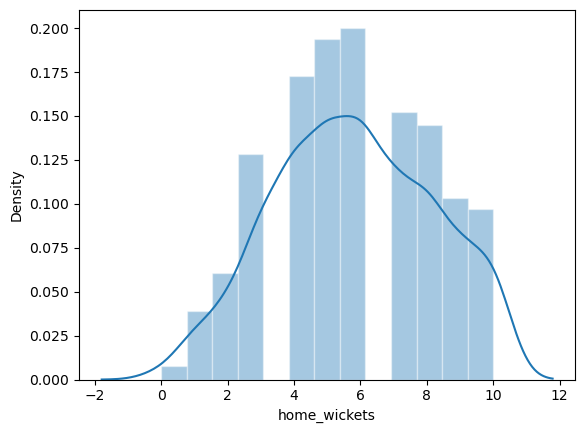

In [186]:
sns.histplot(df['home_wickets'],kde=True,stat='density',kde_kws=dict(cut=3), alpha=.4,edgecolor=(1,1,1,.4),)

<Axes: xlabel='away_overs', ylabel='Density'>

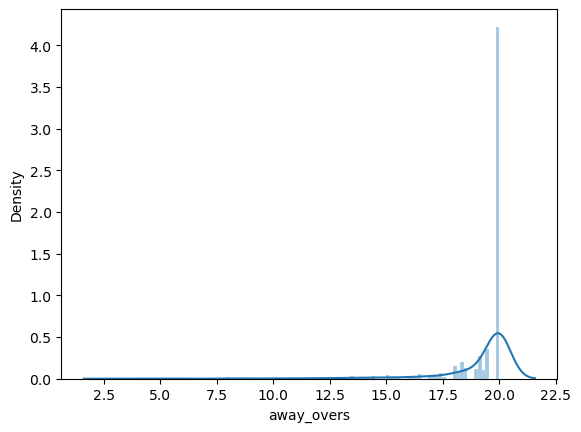

In [187]:
sns.histplot(df['away_overs'],kde=True,stat='density',kde_kws=dict(cut=3), alpha=.4,edgecolor=(1,1,1,.4),)

<Axes: xlabel='season', ylabel='Density'>

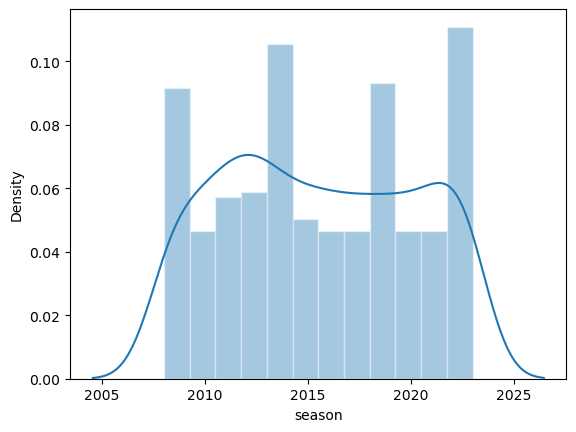

In [188]:
sns.histplot(df['season'],kde=True,stat='density',kde_kws=dict(cut=3), alpha=.4,edgecolor=(1,1,1,.4),)

##### Box Plot

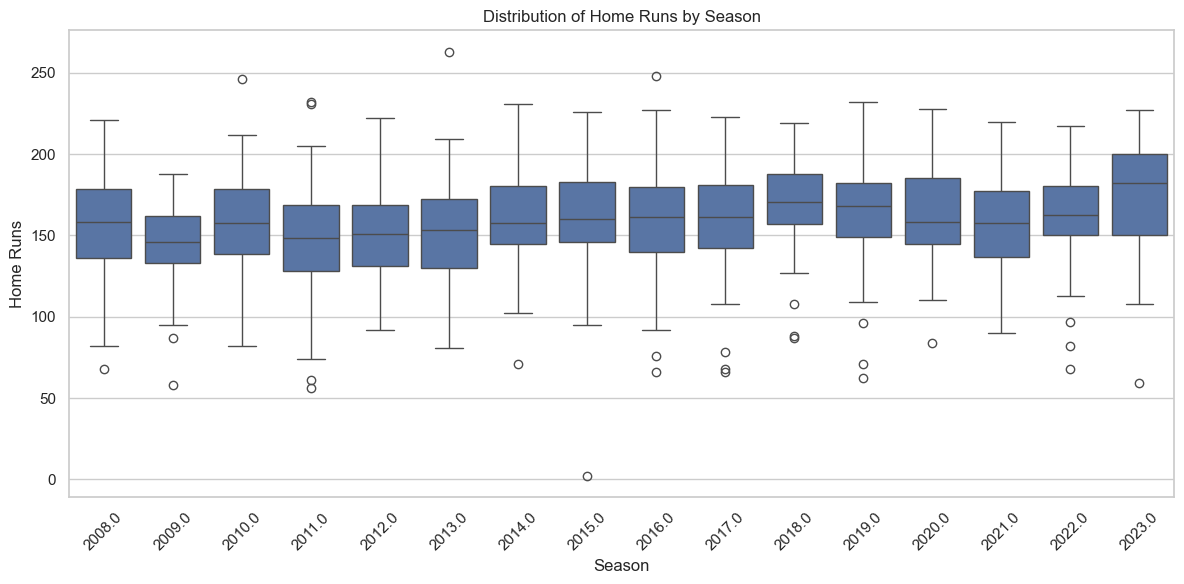

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size and style
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Example: Box plot of home_runs by season
sns.boxplot(data=df, x='season', y='home_runs')

plt.title("Distribution of Home Runs by Season")
plt.xlabel("Season")
plt.ylabel("Home Runs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Correlations

In [192]:
correlation_matrix = df.corr(numeric_only=True)
(correlation_matrix)

season        id  toss_won  venue_id  super_over  \
season           1.000000  0.982209 -0.032265  0.181516    0.048713   
id               0.982209  1.000000 -0.034167  0.172956    0.049012   
toss_won        -0.032265 -0.034167  1.000000  0.020170    0.004466   
venue_id         0.181516  0.172956  0.020170  1.000000    0.028332   
super_over       0.048713  0.049012  0.004466  0.028332    1.000000   
home_overs       0.074207  0.069019 -0.006556  0.063388    0.046788   
home_runs        0.188654  0.191170 -0.037876 -0.060306    0.023179   
home_wickets     0.033430  0.028511  0.052280  0.054925    0.032037   
home_boundaries  0.165689  0.168163 -0.053866 -0.109465    0.007958   
away_overs       0.038379  0.028832 -0.022418  0.033572    0.046690   
away_runs        0.199104  0.197831  0.001163 -0.025866    0.031715   
away_wickets    -0.001727 -0.003277 -0.038340  0.008173    0.016640   
away_boundaries  0.192197  0.191180  0.002256 -0.068895    0.017185   
toss_won_new    -0.032265 -0.034167  1.000000  0.020170    0.004466   

                 home_overs  home_runs  home_wickets  home_boundaries  \
season             0.074207   0.188654      0.033430         0.165689   
id                 0.069019   0.191170      0.028511         0.168163   
toss_won          -0.006556  -0.037876      0.052280        -0.053866   
venue_id           0.063388  -0.060306      0.054925        -0.109465   
super_over         0.046788   0.023179      0.032037         0.007958   
home_overs         1.000000   0.497966      0.341090         0.249917   
home_runs          0.497966   1.000000     -0.204363         0.898946   
home_wickets       0.341090  -0.204363      1.000000        -0.270260   
home_boundaries    0.249917   0.898946     -0.270260         1.000000   
away_overs         0.233988   0.258699     -0.080218         0.205699   
away_runs          0.315202   0.580003      0.087984         0.516856   
away_wickets      -0.099082   0.023454     -0.208234         0.058989   
away_boundaries    0.251770   0.535378      0.110054         0.507512   
toss_won_new      -0.006556  -0.037876      0.052280        -0.053866   

                 away_overs  away_runs  away_wickets  away_boundaries  \
season             0.038379   0.199104     -0.001727         0.192197   
id                 0.028832   0.197831     -0.003277         0.191180   
toss_won          -0.022418   0.001163     -0.038340         0.002256   
venue_id           0.033572  -0.025866      0.008173        -0.068895   
super_over         0.046690   0.031715      0.016640         0.017185   
home_overs         0.233988   0.315202     -0.099082         0.251770   
home_runs          0.258699   0.580003      0.023454         0.535378   
home_wickets      -0.080218   0.087984     -0.208234         0.110054   
home_boundaries    0.205699   0.516856      0.058989         0.507512   
away_overs         1.000000   0.498407      0.279064         0.260640   
away_runs          0.498407   1.000000     -0.282828         0.900233   
away_wickets       0.279064  -0.282828      1.000000        -0.325470   
away_boundaries    0.260640   0.900233     -0.325470         1.000000   
toss_won_new      -0.022418   0.001163     -0.038340         0.002256   

                 toss_won_new  
season              -0.032265  
id                  -0.034167  
toss_won             1.000000  
venue_id             0.020170  
super_over           0.004466  
home_overs          -0.006556  
home_runs           -0.037876  
home_wickets         0.052280  
home_boundaries     -0.053866  
away_overs          -0.022418  
away_runs            0.001163  
away_wickets        -0.038340  
away_boundaries      0.002256  
toss_won_new         1.000000

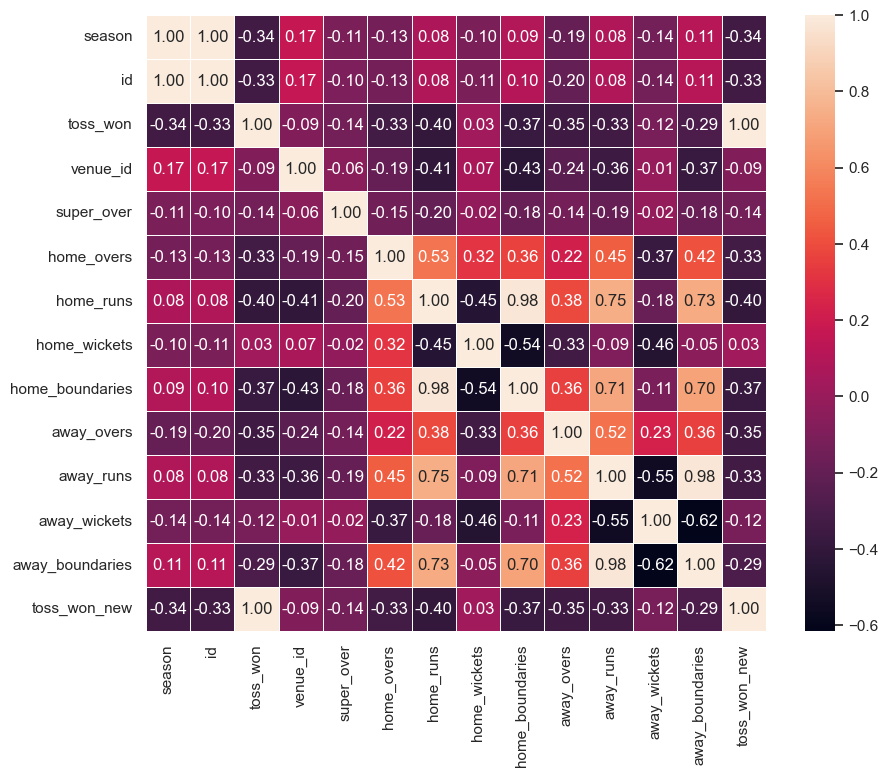

In [199]:
plt.figure(figsize=(10,8), dpi =100)
sns.heatmap(correlation_matrix.corr(), annot=True,fmt=".2f", linewidth=.5)
plt.show()

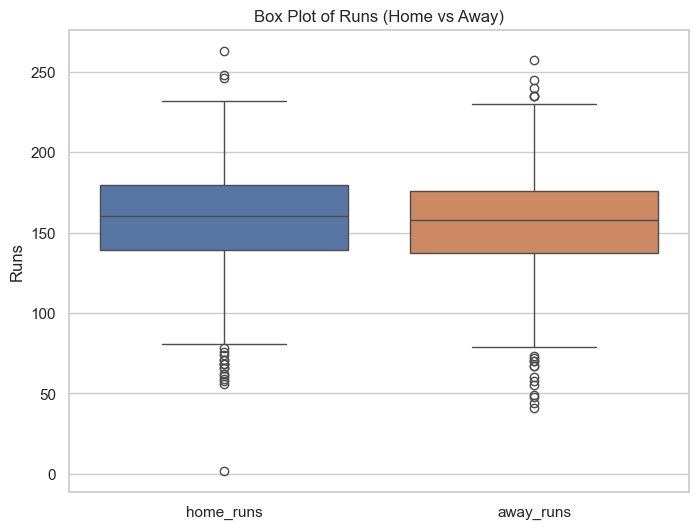

In [212]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['home_runs', 'away_runs']])
plt.title("Box Plot of Runs (Home vs Away)")
plt.ylabel("Runs")
plt.show()

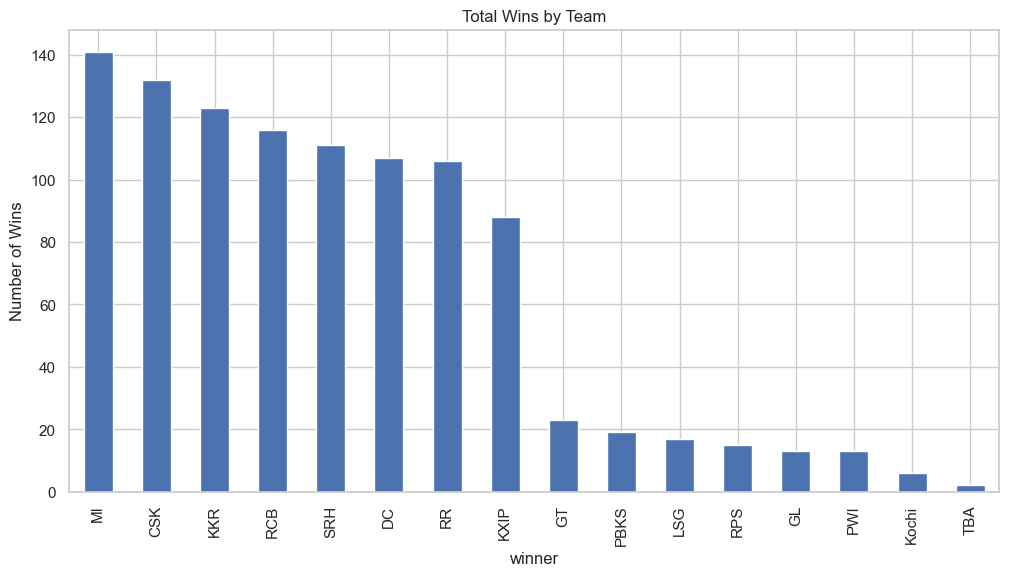

In [222]:
plt.figure(figsize=(12, 6))
df['winner'].value_counts().plot(kind='bar')
plt.title("Total Wins by Team")
plt.ylabel("Number of Wins")
plt.xticks(rotation=90)
plt.show()

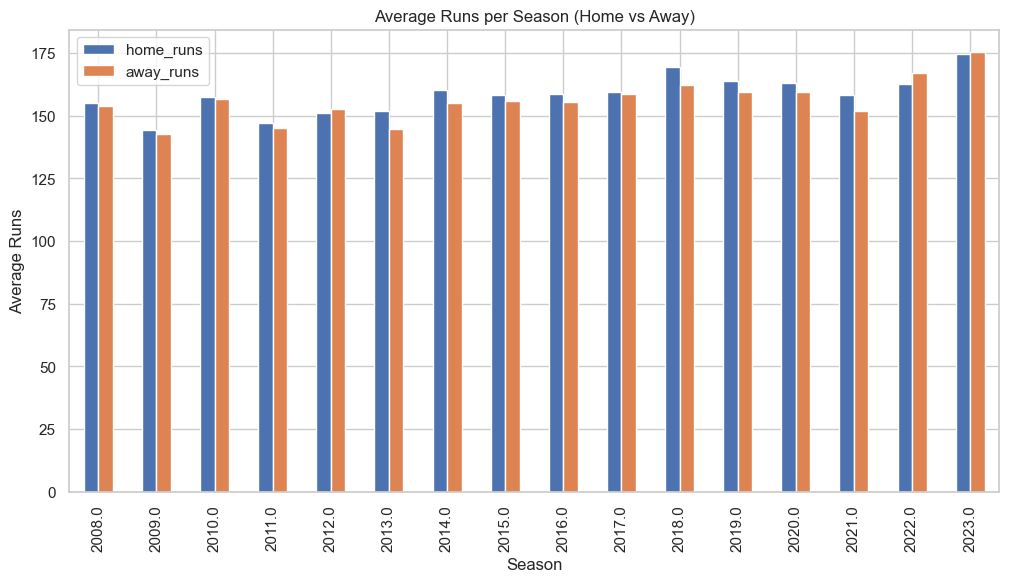

In [220]:
season_avg = df.groupby('season')[['home_runs', 'away_runs']].mean()
season_avg.plot(kind='bar', figsize=(12, 6))
plt.title("Average Runs per Season (Home vs Away)")
plt.ylabel("Average Runs")
plt.xlabel("Season")
plt.show()

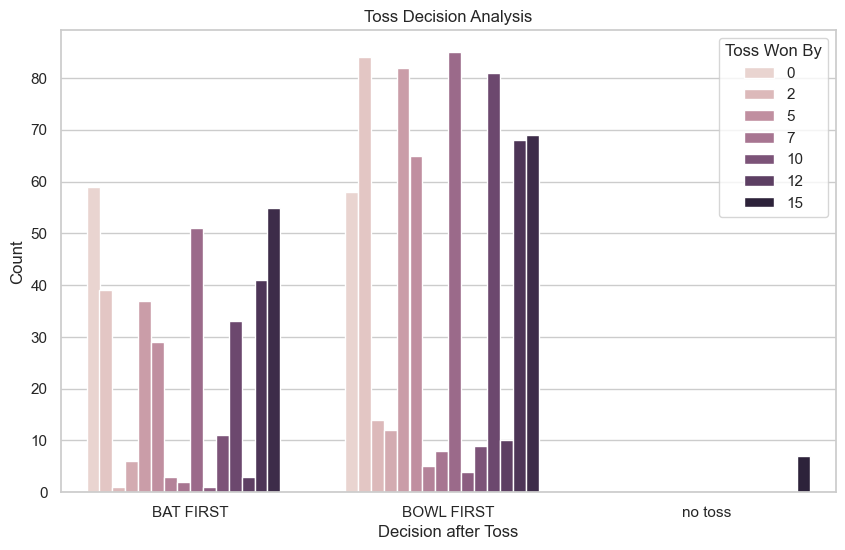

In [224]:
plt.figure(figsize=(10, 6))
sns.countplot(x='decision', hue='toss_won', data=df)
plt.title("Toss Decision Analysis")
plt.xlabel("Decision after Toss")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title='Toss Won By')
plt.show()

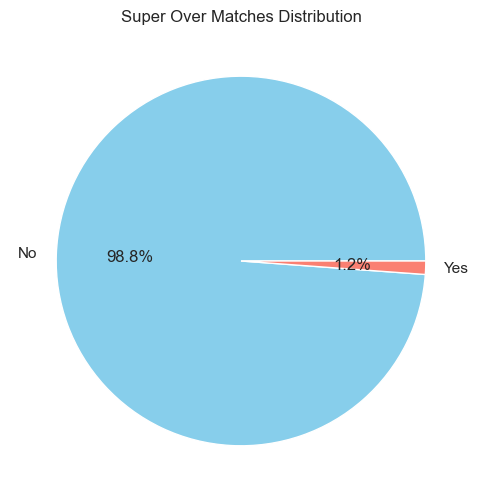

In [226]:
plt.figure(figsize=(6, 6))
df['super_over'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['No', 'Yes'], colors=['skyblue', 'salmon'])
plt.title("Super Over Matches Distribution")
plt.ylabel("")
plt.show()

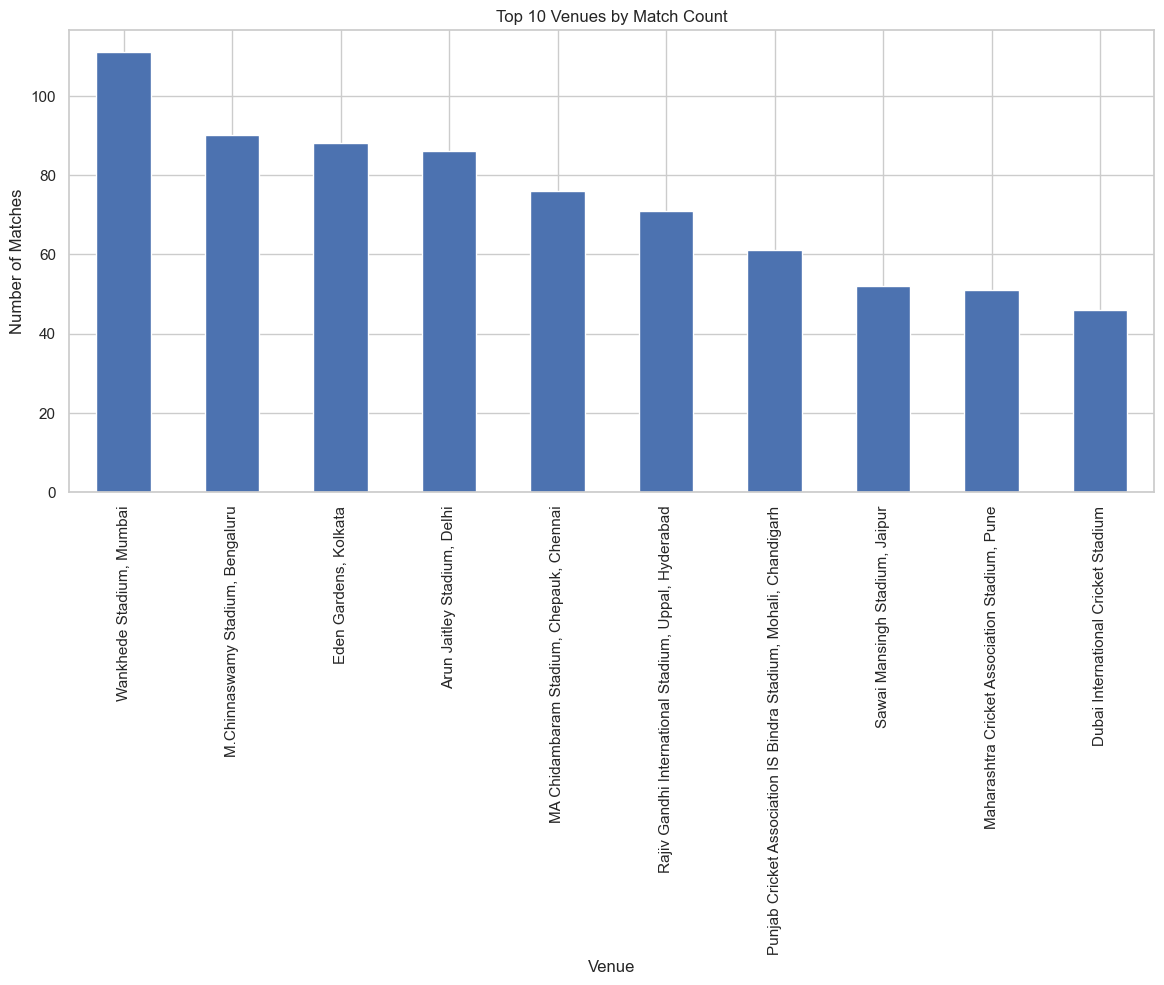

In [232]:
plt.figure(figsize=(14, 6))
df['venue_name'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Venues by Match Count")
plt.xlabel("Venue")
plt.ylabel("Number of Matches")
plt.xticks(rotation=90)
plt.show()

### Conclusion
